In [ ]:
# Show reading in a CSV file to a Dataframe, cleaning the data, create a plot.
# The data is 27 years of NFL stats.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
%matplotlib inline

In [2]:
#Read in the CSV file
file = "Resources/pass_att.csv"
df_original = pd.read_csv(file)
df_original.head()

,team,year,week,yards_per_pass_attempt,winning_margin,total_rushing,passes_had_intercepts,qb_sacks
0,6,1993,4,-1.6,-13.0,24.0,1.0,5.0
1,1,1993,1,-3.7,-17.0,8.0,2.0,6.0
2,2,1993,1,-0.5,-4.0,21.0,1.0,0.0
3,3,1993,1,2.7,24.0,42.0,1.0,1.0
4,4,1993,1,-1.5,-6.0,25.0,1.0,4.0


In [3]:
df_original.describe()

,team,year,week,yards_per_pass_attempt,winning_margin,total_rushing,passes_had_intercepts,qb_sacks
count,14771.000000,14771.000000,14771.000000,1.477100e+04,14771.000000,1.477100e+04,1.477100e+04,1.477100e+04
mean,16.185702,2006.248392,9.321847,-9.934650e+05,-0.029314,-9.934377e+05,-9.934640e+05,-9.934626e+05
std,9.066988,7.722522,5.199630,2.068390e+07,14.692873,2.068390e+07,2.068390e+07,2.068390e+07
min,1.000000,1993.000000,1.000000,-4.316021e+08,-59.000000,-4.316021e+08,-4.316021e+08,-4.316021e+08
25%,8.000000,2000.000000,5.000000,-1.800000e+00,-8.000000,2.100000e+01,0.000000e+00,1.000000e+00
50%,16.000000,2006.000000,9.000000,0.000000e+00,0.000000,2.700000e+01,1.000000e+00,2.000000e+00
75%,24.000000,2013.000000,14.000000,1.800000e+00,8.000000,3.300000e+01,2.000000e+00,3.000000e+00
max,32.000000,2020.000000,22.000000,1.290000e+01,59.000000,6.000000e+01,7.000000e+00,1.200000e+01


In [4]:
# HEY! The mean for yds_per_pass_att_diff should not be that large!
# There are data errors - look at the CSV
df2 = df_original[df_original["yards_per_pass_attempt"] > -100]
df2.describe()

,team,year,week,yards_per_pass_attempt,winning_margin,total_rushing,passes_had_intercepts,qb_sacks
count,14737.000000,14737.000000,14737.000000,14737.00000,14737.000000,14737.000000,14737.000000,14737.000000
mean,16.151523,2006.268576,9.322589,-0.00511,-0.029382,27.326254,0.984461,2.307661
std,9.049443,7.719934,5.200280,2.77965,14.709813,8.153585,1.052356,1.757238
min,1.000000,1993.000000,1.000000,-12.90000,-59.000000,0.000000,-1.000000,-2.000000
25%,8.000000,2000.000000,5.000000,-1.80000,-8.000000,21.000000,0.000000,1.000000
50%,16.000000,2006.000000,9.000000,0.00000,0.000000,27.000000,1.000000,2.000000
75%,24.000000,2013.000000,14.000000,1.80000,8.000000,33.000000,2.000000,3.000000
max,32.000000,2020.000000,22.000000,12.90000,59.000000,60.000000,7.000000,12.000000


In [5]:
#HEY! passes_had_intercepts	and qb_sacks cannot be negative! Cut those out
df3 = df2[df2["passes_had_intercepts"] >= 0]
df4 = df3[df3["qb_sacks"] >= 0]
df4.describe()

,team,year,week,yards_per_pass_attempt,winning_margin,total_rushing,passes_had_intercepts,qb_sacks
count,14690.000000,14690.000000,14690.000000,14690.000000,14690.000000,14690.000000,14690.000000,14690.000000
mean,16.151327,2006.280054,9.320286,-0.013084,-0.062423,27.304629,0.985977,2.316610
std,9.050168,7.720780,5.199957,2.774938,14.705558,8.143180,1.052218,1.751349
min,1.000000,1993.000000,1.000000,-12.900000,-59.000000,0.000000,0.000000,0.000000
25%,8.000000,2000.000000,5.000000,-1.800000,-8.000000,21.000000,0.000000,1.000000
50%,16.000000,2006.000000,9.000000,0.000000,0.000000,27.000000,1.000000,2.000000
75%,24.000000,2013.000000,14.000000,1.800000,8.000000,33.000000,2.000000,3.000000
max,32.000000,2020.000000,22.000000,12.900000,59.000000,60.000000,7.000000,12.000000


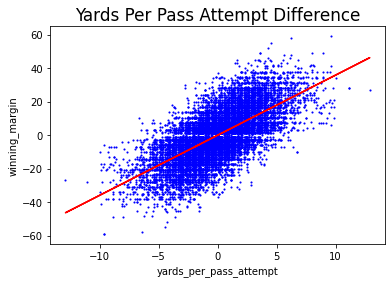

In [6]:
#Data should be clean enough!
#Plot yards_per_pass_attempt as a scatter plot
df4.plot(kind='scatter',x='yards_per_pass_attempt',y='winning_margin',color='blue',s=1.2)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,4)
plt.title("Yards Per Pass Attempt Difference")

#Make the regression line
b, m = polyfit(df4.yards_per_pass_attempt, df4.winning_margin, 1)
plt.plot(df4.yards_per_pass_attempt, b + m * df4.yards_per_pass_attempt, '-', color='red')

plt.show()

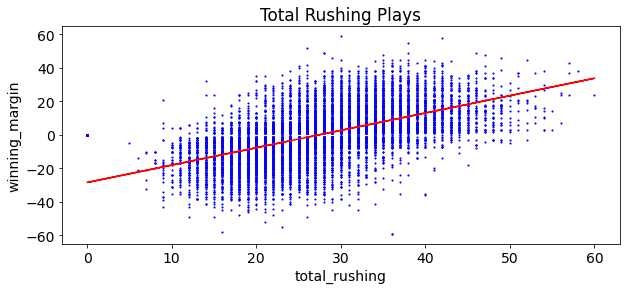

In [7]:
#Plot total_rushing as a scatter plot
df4.plot(kind='scatter',x='total_rushing',y='winning_margin',color='blue',s=1.2)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,4)
plt.title("Total Rushing Plays")

#Make the regression line
b, m = polyfit(df4.total_rushing, df4.winning_margin, 1)
plt.plot(df4.total_rushing, b + m * df4.total_rushing, '-', color='red')

plt.show()

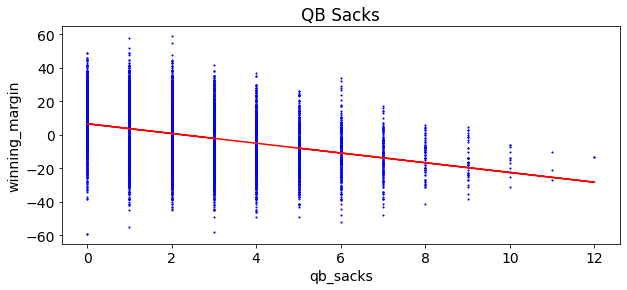

In [8]:
#Plot qb_sacks as a scatter plot
df4.plot(kind='scatter',x='qb_sacks',y='winning_margin',color='blue',s=1.2)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,4)
plt.title("QB Sacks")

#Make the regression line
b, m = polyfit(df4.qb_sacks, df4.winning_margin, 1)
plt.plot(df4.qb_sacks, b + m * df4.qb_sacks, '-', color='red')

plt.show()

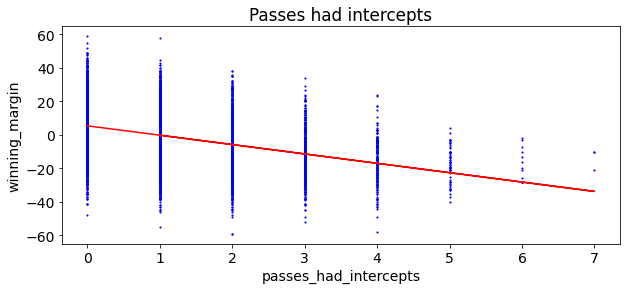

In [9]:
#Plot passes_had_intercepts as a scatter plot
df4.plot(kind='scatter',x='passes_had_intercepts',y='winning_margin',color='blue',s=1.2)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,4)
plt.title("Passes had intercepts")

#Make the regression line
b, m = polyfit(df4.passes_had_intercepts, df4.winning_margin, 1)
plt.plot(df4.passes_had_intercepts, b + m * df4.passes_had_intercepts, '-', color='red')

plt.show()